<a href="https://colab.research.google.com/github/itstyren/reputationRL-coop/blob/main/reputationRL_coop_figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This colab accompanies the paper 'Reputation-based Interaction Promotes Cooperation with Reinforcement Learning' by Tianyu Ren and Xiao-Jun Zeng

# Load Data

In [18]:
import glob
import pickle
# Request the Google drive API
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1SYjYz4wnmVsY_KUMZgeruX1IYjv-2u4u'
downloaded = drive.CreateFile({'id': file_id})
# located at the root of your drive
downloaded.GetContentFile('combine.pkl')

In [19]:
# Iterate over each file in the directory
for file_name in glob.glob('*.pkl'):
    print(file_name)
    with open(file_name, 'rb') as file:
    # Read the data from the file and append it to the combined data list
      data =pickle.load(file)

combine.pkl


# Packages

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from matplotlib import colors, cm
import networkx as nx

# Plot Figure 2
Equilibrium fraction of cooperators in dependence on the temptation and reputation sensitivity for different tolerance threshold values.

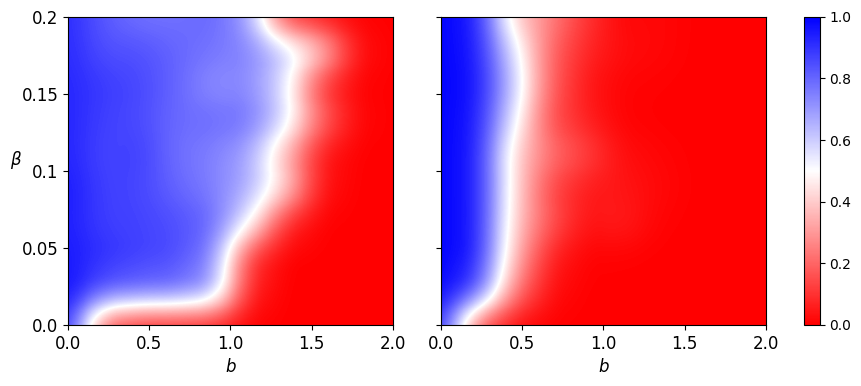

In [21]:
# load data
fig2_data=data[0]

# setup canvas
fig = plt.figure(num="Cooperation heatmap", figsize=(10, 4))
fig.subplots_adjust(hspace=0.15,wspace=0.15)
fig_axes = fig.subplots(1, 2, squeeze=False)

# plot
images = []
# set graph index for plotting
list_index = 0
for j in range(2):
  images.append(
  fig_axes[0, j].imshow(
      fig2_data[list_index],cmap=cm.bwr_r,interpolation="quadric",aspect="auto"))

  fig_axes[0, j].set_xlim(0, 9)
  fig_axes[0, j].set_ylim(9, 0)
  fig_axes[0, j].set_xticks(np.linspace(0, 9, 5))
  fig_axes[0, j].set_yticks(np.linspace(0, 9, 5))
  fig_axes[0, j].set_xticklabels(np.around(np.linspace(0.0,2.0,5),decimals=2,),fontsize=12,)
  fig_axes[0, j].set_yticklabels(np.flipud(np.around(np.linspace(0.0,0.2,5),decimals=2,)),fontsize=12,)
  fig_axes[0, j].set_xlabel(r"$b$", fontsize=12)
  fig_axes[0, j].set_ylabel(r"$\beta$", rotation=0,fontsize=12)
  fig_axes[0, j].label_outer()
  list_index+=1

norm = colors.Normalize(vmin=0, vmax=1)
h_norm = colors.Normalize(vmin=0,vmax=1,)
for im in images:
  im.set_norm(norm)
cbar = fig.colorbar(images[0], ax=fig_axes, fraction=0.05, shrink=1, aspect=20)

# Plot Figure 3
Coevolutionary dynamics of strategy and network structure.

In [22]:
# load data
fig3_data=data[1]
fraction_record_list=fig3_data[0]
degree_cumulative_list=fig3_data[1]
repu_degree_list=fig3_data[2]
degree_histogram_list=fig3_data[3]
agent_num=fig3_data[4]
cooperation_degree_list=fig3_data[5]
link_record_list=fig3_data[6]
# strategy color: cooperation, defection
strategy_colour_set = np.array([ '#0c056d' , '#DC143C' ])
link_colour_set = np.array([ '#0c056d','#009E73','#DC143C','#fbd060' ])

## The fraction of cooperators and defectors

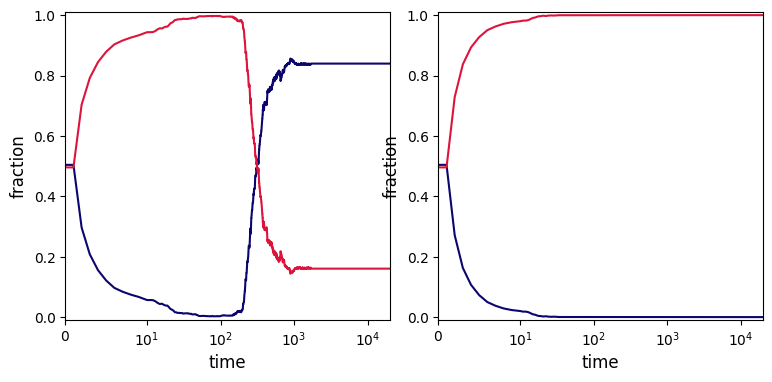

In [23]:
# setup canvas
fig = plt.figure(num="Strategy Fraction With Time", figsize=(9, 4))
fig.subplots_adjust(hspace=0.15,wspace=0.15)
fig_axes = fig.subplots(1, 2, squeeze=False)

# set graph index for plotting
list_index = 0
for j in range(2):
  # plot each figure
  for strategy_index in range(len(fraction_record_list[0])):
    fig_axes[0][j].plot(
                    fraction_record_list[list_index][strategy_index],
                    color=strategy_colour_set[strategy_index],
                )
    fig_axes[0, j].set_xlim(0, len(fraction_record_list[0][0]) + 1)
    fig_axes[0, j].set_ylim(-0.01, 1.01)
    # set x-axis
    fig_axes[0, j].set_xscale("symlog", linthresh=10)
    fig_axes[0, j].set_xlabel("time", fontsize=12)
    fig_axes[0, j].set_ylabel("fraction", fontsize=12)

  list_index+=1

## Cumulative degree distribution and degree-dependent reputation score

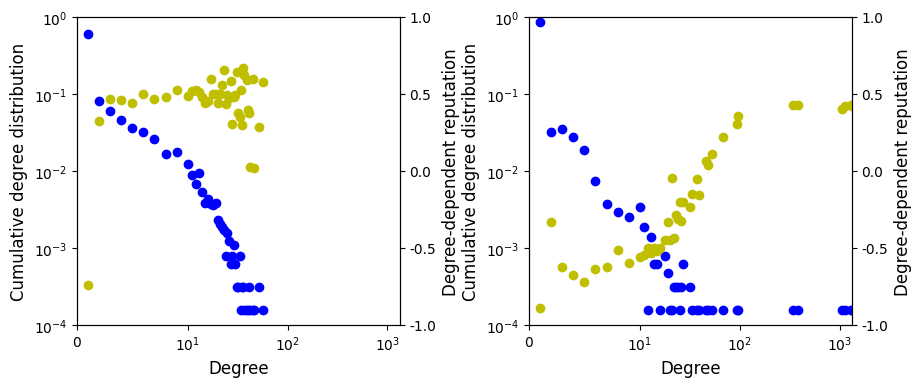

In [24]:
# setup canvas
fig = plt.figure(num="Degree Cumulative Frequency", figsize=(10, 4))
fig.subplots_adjust(hspace=0.2,wspace=0.4)
fig_axes = fig.subplots(1, 2, squeeze=False)

# set graph index for plotting
list_index = 0
for j in range(2):
  # plot each figure
  # plot cumulative degree distribution
  fig_axes[0][j].plot(
                degree_cumulative_list[list_index][0],
                degree_cumulative_list[list_index][1] / agent_num,
                "bo",
            )
  right_for_fig = fig_axes[0][j].twinx()
  right_for_fig.plot(
                repu_degree_list[list_index][0],
                repu_degree_list[list_index][1],
                "yo",
            )
  fig_axes[0, j].set_xlim(0, 1326)
  fig_axes[0, j].set_ylim(0.0001, 1)
  right_for_fig.set_ylim(-1, 1)
  fig_axes[0, j].set_xscale("symlog", linthresh=10)
  # swt y-axis scale
  fig_axes[0, j].set_yscale("symlog", linthresh=0.0001)
  fig_axes[0, j].set_xlabel("Degree", fontsize=12)
  fig_axes[0, j].set_ylabel("Cumulative degree distribution", fontsize=12)
  right_for_fig.set_ylabel("Degree-dependent reputation", fontsize=12)
  right_for_fig.set_yticks(np.linspace(-1, 1, 5))
  right_for_fig.set_yticklabels(np.around(np.linspace(-1, 1, 5), decimals=1))
  list_index +=1

 ## Distribution of cooperators and defectors with degree

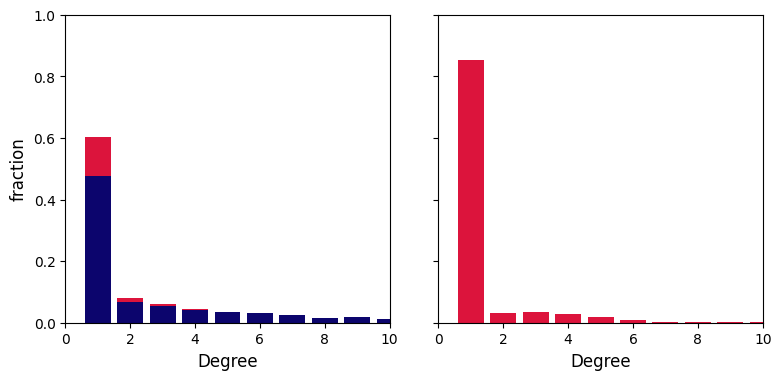

In [25]:
# setup canvas
fig = plt.figure(num="Degree Cumulative Frequency", figsize=(9, 4))
fig.subplots_adjust(hspace=0.15,wspace=0.15)
fig_axes = fig.subplots(1, 2, squeeze=False)

# set graph index for plotting
list_index = 0
for j in range(2):
  # pre-calculate for bar
  bottom = np.zeros(len(degree_histogram_list[list_index][0][-11:]))
  # calculate the overall cooperaiton under this degree configuration
  cooperaion_fraction = (degree_histogram_list[list_index][1][-11:] / agent_num) * cooperation_degree_list[list_index][-11:]
  # plot degree histogram distribution for degree [0,10]
  fig_axes[0][j].bar(degree_histogram_list[list_index][0][-11:],cooperaion_fraction,
                bottom=bottom,color=strategy_colour_set[0])
  bottom += (degree_histogram_list[list_index][1][-11:] / agent_num) * cooperation_degree_list[list_index][-11:]
  fig_axes[0][j].bar(degree_histogram_list[list_index][0][-11:],(degree_histogram_list[list_index][1][-11:] / agent_num)- cooperaion_fraction,
                bottom=bottom,color=strategy_colour_set[1])
  fig_axes[0, j].set_ylim(0, 1)
  fig_axes[0, j].set_xlim(0.0, 10)
  fig_axes[0, j].set_xlabel("Degree", fontsize=12)
  fig_axes[0, j].set_ylabel("fraction", fontsize=12)
  fig_axes[0, j].label_outer()
  list_index +=1

##  Average degree of each strategy and the evolution of the associativity coefficient

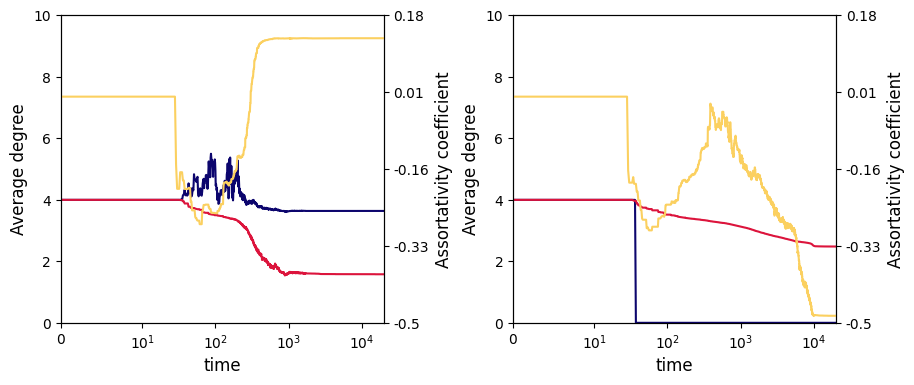

In [26]:
# setup canvas
fig = plt.figure(num="Strategy degree and associativity coefficient", figsize=(10, 4))
fig.subplots_adjust(hspace=0.2,wspace=0.4)
fig_axes = fig.subplots(1, 2, squeeze=False)

# set graph index for plotting
list_index = 0
for j in range(2):
  right_fig = fig_axes[0][j].twinx()
  for strategy_index in range(len(link_record_list[list_index][2])):
    fig_axes[0][j].plot(
                    link_record_list[list_index][2][strategy_index],
                    color=strategy_colour_set[strategy_index],
                )

  right_fig.plot(
                link_record_list[list_index][1], color=link_colour_set[3]
            )
  fig_axes[0, j].set_xlim(0, len(fraction_record_list[0][0]) + 1)
  right_fig.set_ylim(-0.50 , 0.18)
  fig_axes[0, j].set_ylim(-0.01, 10.01)
  fig_axes[0, j].set_xlabel("time", fontsize=12)
  right_fig.set_yticks(np.linspace(-0.50 , 0.18, 5))
  right_fig.set_yticklabels(np.around(np.linspace(-0.50 , 0.18, 5), decimals=2))

  right_fig.set_ylabel("Assortativity coefficient", fontsize=12)
  fig_axes[0, j].set_ylabel("Average degree", fontsize=12)
  right_fig.set_xscale("symlog", linthresh=10)
  list_index +=1

# Plot Figure 4
> WARNING: This part of the code takes a long time to compile

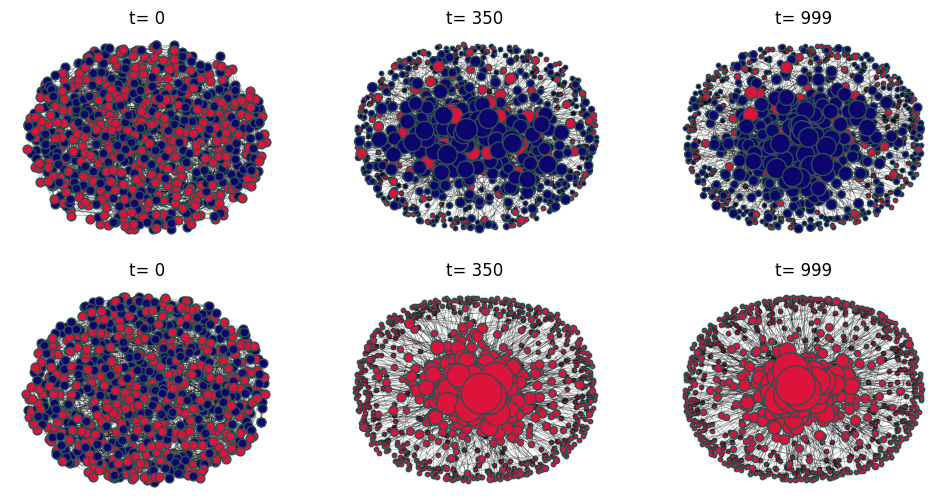

In [27]:
# load data
distribution_record_list=data[2]

# setup canvas
fig = plt.figure(num="strategy distribution", figsize=(10, 6))
fig.tight_layout()
fig.subplots_adjust(left=0.05, right=0.98)

time_interval=[0,350,999]


# The index  of figure
list_index = 0
for i in range(2):
    for j in range(3):
        plt.subplot(2, 3, list_index + 1)
        plt.axis("off")

        graph = distribution_record_list[i][j][0]

        pos = nx.spring_layout(graph, k=0.38)
        node_degree_list = [v for k, v in dict(graph.degree).items()]
        for node_i, node in enumerate(graph.nodes()):
            node_collection = nx.draw_networkx_nodes(graph.subgraph([node]),pos,node_color=strategy_colour_set[distribution_record_list[i][j][1][node_i]],
                    node_size=10 * node_degree_list[node_i]
                    if node_degree_list[node_i] != 0
                    else 5,
                )
            node_collection.set_zorder(node_degree_list[node_i])
            node_collection.set_edgecolor("#2F4F4F")

        for edge in graph.edges():
                edge_collection = nx.draw_networkx_edges(
                    graph, pos, edgelist=[edge], width=0.4, alpha=0.4
                )
        plt.title("t= %s" % (time_interval[j]))
        list_index += 1



# Plot Figure5

In [28]:
# load data
cooperation_fraction_tolerance=data[3]
link_record_list=data[4][2]


marker_style = [".", "v", "s", "P", "d"]
link_cycler = [":", "--", "-."]

## Tolerance thresholds in relation to different temptation values

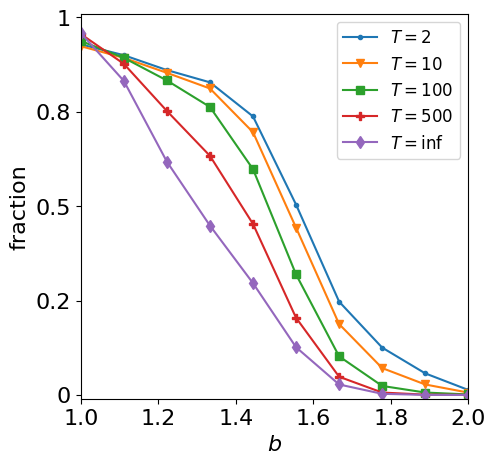

In [29]:
# setup canvas
fig = plt.figure(num="Tolerance thresholds", figsize=(5, 5))
labels = [r"$T = $"  + str(value) for value in [2,10,100,500,"inf"]]
for curves_index in range(5):
  plt.plot(cooperation_fraction_tolerance[0][curves_index],marker=marker_style[curves_index])

ax = plt.gca()
ax.set_ylabel("fraction", fontsize=16)
ax.set_xlabel(r"$b$" , fontsize=16)
ax.set_xlim(1.0,2.0)
ax.set_ylim(-0.01, 1.01)
ax.set_xticks(np.linspace(0, 9, 6))
ax.set_xticklabels(np.around(np.linspace(1.0,2.0,6),decimals=2,),fontsize=16)
ax.set_yticks(np.linspace(0, 1, 5))
ax.set_yticklabels([0, 0.2, 0.5, 0.8, 1], fontsize=16)
ax.legend(labels=labels, loc="upper right", fontsize=12)

## The fraction of CC/CD/DD links

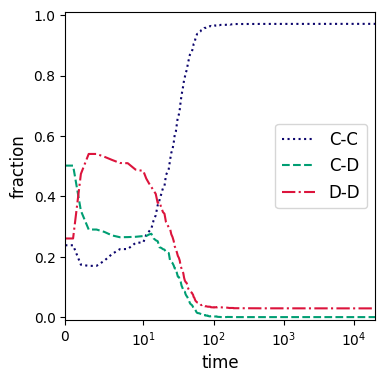

In [30]:
# setup canvas
fig = plt.figure(num="Link strategy", figsize=(4, 4))
link_label = ["C-C", "C-D", "D-D"]

for link_index in range(3):
  # plot link strategy
  plt.plot(link_record_list[0][0][link_index],color=link_colour_set[link_index],linestyle=link_cycler[link_index])

ax = plt.gca()
ax.set_ylim(-0.01, 1.01)
ax.set_xlim(0, len(fraction_record_list[0][0]) + 1)
ax.set_xscale("symlog", linthresh=10)
ax.set_xlabel("time", fontsize=12)
ax.set_ylabel("fraction", fontsize=12)
ax.legend(labels=link_label, loc="center right", fontsize=12)

# Plot Figure6

In [31]:
# load data
cooperation_fraction_dilemma=data[5]
cooperation_fraction_norm=data[6]

## The effect of time scale separation on cooperation levels

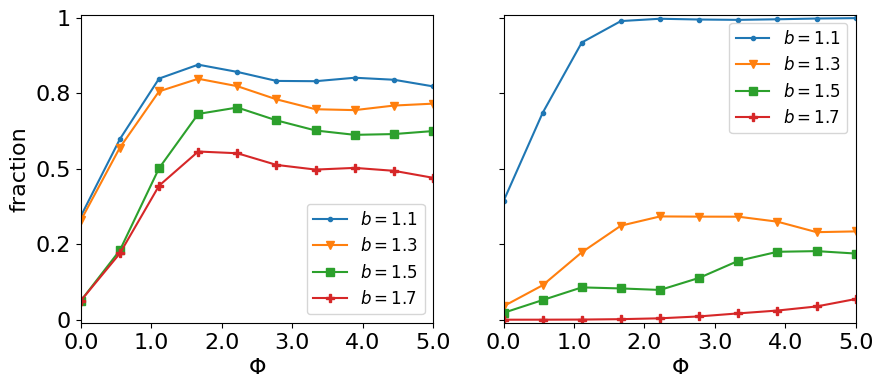

In [32]:
# setup canvas
fig = plt.figure(num="Time scale separation", figsize=(10, 4))
fig.subplots_adjust(hspace=0.2,wspace=0.2)
fig_axes = fig.subplots(1, 2, squeeze=False)

# set graph index for plotting
list_index = 0
labels = [r"$b = $"  + str(value) for value in [1.1,1.3,1.5,1.7]]
for j in range(2):
  for curves_index in range(4):
    fig_axes[0][j].plot(cooperation_fraction_dilemma[list_index][curves_index],marker=marker_style[curves_index])
  list_index+=1
  fig_axes[0][j].set_ylabel("fraction", fontsize=16)
  fig_axes[0][j].set_xlabel(r"$\Phi$", fontsize=16)
  fig_axes[0, j].set_xlim(0,5.0,)
  fig_axes[0][j].set_ylim(-0.01, 1.01)
  fig_axes[0][j].set_xticks(np.linspace(0, 9, 6))
  fig_axes[0][j].set_xticklabels(np.around(np.linspace(0,5,6),decimals=2,),fontsize=16)
  fig_axes[0][j].set_yticks(np.linspace(0, 1, 5))
  fig_axes[0][j].set_yticklabels([0, 0.2, 0.5, 0.8, 1], fontsize=16)
  fig_axes[0,][j].label_outer()
  fig_axes[0,][j].legend(labels=labels, fontsize=12)

## The effect of social norm on cooperation levels

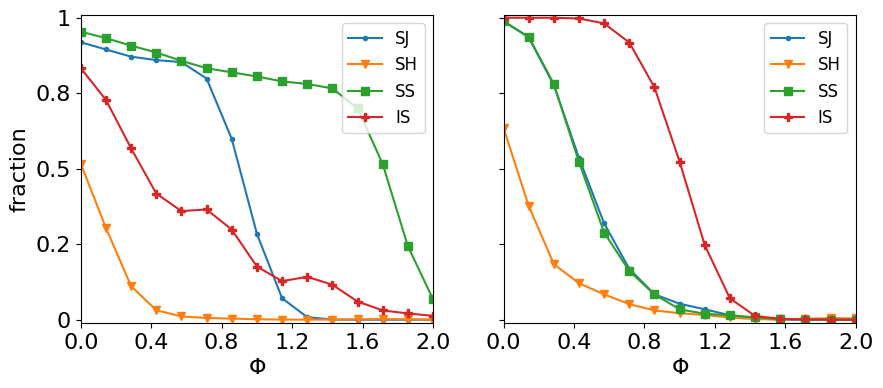

In [33]:
# setup canvas
fig = plt.figure(num="Time scale separation", figsize=(10, 4))
fig.subplots_adjust(hspace=0.2,wspace=0.2)
fig_axes = fig.subplots(1, 2, squeeze=False)

# set graph index for plotting
list_index = 0
labels = ['SJ','SH','SS','IS']
for j in range(2):
  for curves_index in range(4):
    fig_axes[0][j].plot(cooperation_fraction_norm[list_index][curves_index],marker=marker_style[curves_index])
  list_index+=1
  fig_axes[0][j].set_ylabel("fraction", fontsize=16)
  fig_axes[0][j].set_xlabel(r"$\Phi$", fontsize=16)
  fig_axes[0, j].set_xlim(0,2)
  fig_axes[0][j].set_ylim(-0.01, 1.01)
  fig_axes[0][j].set_xticks(np.linspace(0, 14, 6))
  fig_axes[0][j].set_xticklabels(np.around(np.linspace(0,2,6),decimals=2,),fontsize=16)
  fig_axes[0][j].set_yticks(np.linspace(0, 1, 5))
  fig_axes[0][j].set_yticklabels([0, 0.2, 0.5, 0.8, 1], fontsize=16)
  fig_axes[0,][j].label_outer()
  fig_axes[0,][j].legend(labels=labels, fontsize=12)

# Plot Figure7

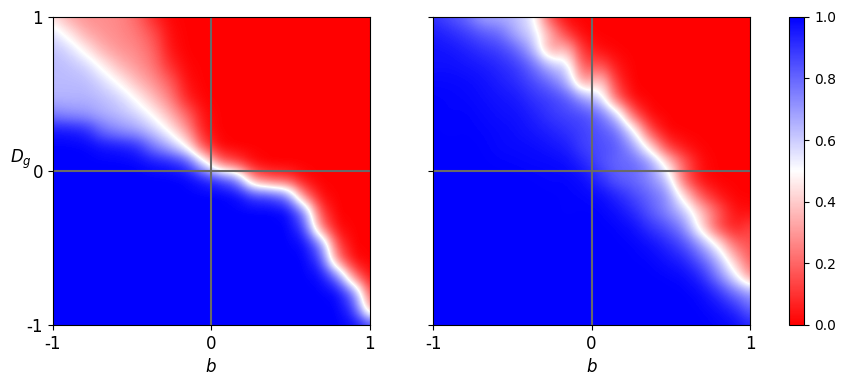

In [43]:
# load data
fig7_data=data[-1]

# setup canvas
fig = plt.figure(num="Cooperation heatmap", figsize=(10, 4))
# fig.subplots_adjust(hspace=0.15,wspace=0.15)
fig_axes = fig.subplots(1, 2, squeeze=False)

# plot
images = []
# set graph index for plotting
list_index = 0
for j in range(2):
  images.append(
  fig_axes[0, j].imshow(
      fig7_data[list_index],cmap=cm.bwr_r,interpolation="quadric",aspect="auto"))

  fig_axes[0, j].set_xlim(0, len(fig7_data[0])-1)
  fig_axes[0, j].set_ylim(len(fig7_data[0][0])-1, 0)
  fig_axes[0, j].set_xticks(np.linspace(0, len(fig7_data[0])-1, 3))
  fig_axes[0, j].set_yticks(np.linspace(0, len(fig7_data[0][0])-1, 3))
  fig_axes[0, j].set_xticklabels(np.rint(np.linspace(-1,1,3)).astype(int),fontsize=12,)
  fig_axes[0, j].set_yticklabels(np.flipud(np.rint(np.linspace(-1,1,3)).astype(int)),fontsize=12,)
  fig_axes[0, j].set_xlabel(r"$b$", fontsize=12)
  fig_axes[0, j].set_ylabel(r"$D_g$", rotation=0,fontsize=12)
  fig_axes[0, j].label_outer()
  fig_axes[0, j].axhline(y=(len(fig7_data[0]) - 1) / 2,color="dimgray",)
  fig_axes[0, j].axvline(x=(len(fig7_data[0][0]) - 1) / 2,color="dimgray",)
  list_index+=1

norm = colors.Normalize(vmin=0, vmax=1)
h_norm = colors.Normalize(vmin=0,vmax=1,)
for im in images:
  im.set_norm(norm)
cbar = fig.colorbar(images[0], ax=fig_axes, fraction=0.05, shrink=1, aspect=20)